<a href="https://colab.research.google.com/github/cstecker/politicsRLab/blob/main/Ja%2C%20wen%20w%C3%A4hlen%20Sie%20denn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **In welcher Blase bin ich denn hier gelandet?**

Zum Einstieg wollen wir mit ein paar einfachen Analysen loslegen. Am besten schauen wir uns erstmal unsere Kommillitonen etwas genauer an, die mit uns in der Vorlesung sitzen.

Dazu nutzen wir das Colab von google. Es erlaubt uns, das Statistikprogramm R zu nutzen ohne das wir uns mit der Installation oder Paketeverwaltung ausführlich beschäftigen müssen. (Sie können alles aber auch wie die Profis  in R-Studio implementieren. Weitere Infos dazu finden Sie hier: [LINK](http://chrstecker.de/teaching/ein-appetizer-fuer-die-datenanalyse-mit-r/))



**Alle Befehle bzw. Code-Schnipsel können Sie mit *Strg+Enter* oder durch das klicken des Play-Buttons passagenweise ausführen.** Darunter sehen Sie dann jeweils welches Ergebnis die jeweiligen Zeilen produzieren.
Sie können die Zeilen auch verändern und schauen, wie sich der Code verändert.

Laden wir uns zunächst die Library mit den Befehlen, die wir bei der Analyse benötigen. Libraries sind Bibliotheken von Befehlen. Das tidyverse ist eine ganze Sammlung von Paketen, die insbesondere von Hadley Wickham, einem Superstar in der R-Welt, geprägt wurden:

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Nun laden wir uns den Datensatz zur Vorlesungsumfrage, mit dem wir weiter arbeiten wollen. (Der aufbereitete Datensatz wird auf github bereitgestellt. Die Details hierzu müssen uns erst einmal nicht weiter kümmern).

In [ ]:
# Datensatz herunterladen -------------------------------------------------------------
#download.file("https://github.com/cstecker/politicsRLab/blob/main/data/survey2023-04_colab.rds?raw=true", "survey2023-04_colab.rds")
download.file("https://github.com/cstecker/politicsRLab/blob/main/data/survey2023-10_colab.rds?raw=true", "survey2023-10_colab.rds")

In [ ]:
# Datensatz in die Analyseplattform laden
survey <- readRDS("survey2023-10_colab.rds")

Für einen ersten Blick auf die Daten geben wir ein:

In [ ]:
glimpse(survey)

Rows: 120
Columns: 24
$ geschlecht       <fct> Weiblich, Weiblich, Weiblich, Männlich, Männlich, Män…
$ skalo_cdu        <fct> 1, -3, 0, -5, 1, -4, -1, -2, 0, 0, -2, 3, 1, -4, 3, -…
$ skalo_spd        <fct> 1, 0, 2, 3, 4, 2, 2, 0, 2, 2, 3, -5, -5, -4, 2, -1, 4…
$ skalo_pds        <fct> 2, 3, 1, 1, 2, 3, -3, -2, -3, -1, 3, -5, -5, -5, -2, …
$ skalo_gru        <fct> 1, 1, -2, 4, 3, 3, 3, 3, 1, 2, 2, -5, -2, -5, -3, 1, …
$ skalo_fdp        <fct> 1, -2, 0, -4, -3, -2, 1, -3, 3, -3, 0, 2, -5, -5, 0, …
$ skalo_afd        <fct> -5, -5, -3, -5, -5, -5, -5, -5, -5, -5, -5, 5, 3, -5,…
$ vote_text        <chr> "", "", "", "Tierschutzpartei", "", "", "Volt", "V Pa…
$ lire_self        <fct> NA, NA, 3, 4, 2, 1, 2, 3, 6, 3, 3, 8, 5, 6, 6, 1, 3, …
$ econ_self        <fct> 1, 1, 6, 4, 1, 2, 2, 3, 5, 3, 7, 8, 6, 6, 4, 1, 3, 6,…
$ immi_self        <fct> 1, NA, 7, 1, 1, NA, 3, 4, 6, 4, 1, 10, 8, 5, 4, 1, NA…
$ klim_self        <fct> 1, NA, 5, 1, 3, 2, 2, 1, 3, 5, 1, NA, 7, 6, 5, NA, 5,…
$ euin_self       

Wir erhalten nun eine Auflistung aller Variablen mit weiteren Informationen. In der linken Spalte sehen wir die Variablen des Datensatzes. Jeweils rechts daneben steht eine kleine Übersicht über die Antworten der Studierenden.
Aus der Excelwelt sind uns rechteckige Datensätze vertraut. Auch so können wir auf die Daten schauen - in den Zeilen sind Fälle (also Kommillitonen), in den Spalten Variablen.

In [ ]:
survey %>% View()

geschlecht,skalo_cdu,skalo_spd,skalo_pds,skalo_gru,skalo_fdp,skalo_afd,vote_text,lire_self,econ_self,⋯,design_ddpartiz,design_introddem,design_intromw,design_minreg,design_direktbp,design_br,design_direktbk,design_manyparty,design_bverfge,party
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Weiblich,1,1,2,1,1,-5,,NA,1,⋯,stimme eher zu,teils/teils,stimme gar nicht zu,stimme gar nicht zu,stimme eher nicht zu,stimme gar nicht zu,teils/teils,teils/teils,stimme eher zu,son
Weiblich,-3,0,3,1,-2,-5,,NA,1,⋯,stimme eher nicht zu,stimme gar nicht zu,stimme gar nicht zu,stimme eher nicht zu,teils/teils,stimme gar nicht zu,teils/teils,stimme eher zu,stimme gar nicht zu,pds
Weiblich,0,2,1,-2,0,-3,,3,6,⋯,stimme eher zu,stimme eher zu,stimme gar nicht zu,teils/teils,stimme eher nicht zu,stimme gar nicht zu,teils/teils,teils/teils,teils/teils,spd
Männlich,-5,3,1,4,-4,-5,Tierschutzpartei,4,4,⋯,stimme eher zu,teils/teils,stimme eher nicht zu,stimme gar nicht zu,stimme eher nicht zu,stimme eher nicht zu,stimme gar nicht zu,stimme voll zu,teils/teils,tir
Männlich,1,4,2,3,-3,-5,,2,1,⋯,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher zu,stimme gar nicht zu,stimme eher nicht zu,teils/teils,stimme eher nicht zu,spd
Männlich,-4,2,3,3,-2,-5,,1,2,⋯,stimme eher zu,stimme voll zu,stimme eher nicht zu,teils/teils,stimme voll zu,teils/teils,stimme eher zu,stimme voll zu,stimme eher zu,gru
Männlich,-1,2,-3,3,1,-5,Volt,2,2,⋯,teils/teils,stimme eher nicht zu,teils/teils,stimme eher zu,stimme gar nicht zu,stimme gar nicht zu,stimme gar nicht zu,stimme voll zu,teils/teils,vol
Weiblich,-2,0,-2,3,-3,-5,V Partei hoch3,3,3,⋯,stimme gar nicht zu,stimme gar nicht zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,stimme gar nicht zu,stimme eher zu,stimme eher nicht zu,son
Männlich,0,2,-3,1,3,-5,,6,5,⋯,stimme eher zu,stimme eher zu,stimme eher nicht zu,teils/teils,teils/teils,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,teils/teils,spd


Schauen wir uns mal ein paar Eigenschaften unserer Kommillitionen an. Wie ist denn die Geschlechterverteilung?

In [ ]:
survey %>% count(geschlecht)

geschlecht,n
<fct>,<int>
Weiblich,38
Männlich,81
divers,1


Versuchen Sie *count* mal selbst, z. B. mit der Variable *immi_self*!

In [ ]:
# Hier könnte/sollte ihr Code stehen
survey %>% count(immi_self)

immi_self,n
<fct>,<int>
1,11
2,17
3,11
4,17
5,17
6,8
7,9
8,6
9,6


## **Wie würden die Kursteilnehmer abstimmen, wenn am nächsten Sonntag Bundestagswahl wäre?**

Nun sind wir neugierig, welcher Partei unsere Kommillitoninnen und Kommillitonen anhängen. Diese Information ist in der Variable vote hinterlegt:

In [ ]:
survey %>% count(vote)

vote,n
<chr>,<int>
AfD,7
Bündnis90 / die Grünen,33
CDU,18
FDP,7
Ich würde nicht wählen,5
SPD,20
Sonstiges:,15
Tierschutzpartei,1
Volt,3


Wie unordentlich bei diesem zersplitterten Parteiensystem. Wir müssen sortieren!

In [ ]:
survey %>% count(vote, sort = TRUE)

vote,n
<chr>,<int>
Bündnis90 / die Grünen,33
SPD,20
CDU,18
Sonstiges:,15
die Linke,11
AfD,7
FDP,7
Ich würde nicht wählen,5
Volt,3


Und jetzt noch Prozente. Die Prozente berechnen wir mit *mutate* – dies ist das *tidyverse*-Verb zum Generieren neuer Variablen. Erst berechnen wir *totalvote*. Dies ist die Gesamtzahl aller Stimmen. Mit einem Komma abgetrennt, haben wir eine weitere Variable, *share* erstellt, die uns die Prozente ausgibt. Und wir haben gleich noch gelernt, dass man Kommentare mit einem anführenden # in den Code schreiben kann. Kommentieren Sie am besten immer ausführlicher als Sie es im Moment für notwendig erachten. Dann schauen Sie in vierzehn Tagen weniger ratlos auf den Code, den Sie vor vierzehn Tagen selbst flüssig heruntergeschrieben haben.

Wenn Sie dies vertiefen wollen, lesen Sie sich dazu am besten auch das Kapitel in [R for DataScience](https://r4ds.had.co.nz/) durch. Da wir R als Programmiersprache in Colab nutzen, lässt sich alles von dort auch hier anwenden!

In [ ]:
survey %>%
  count(vote) %>%
  # Berechnen der Prozentanteile mit mutate, die neuen Variablen nennen wir dann totalvotes und share
  mutate(totalvotes = sum(n),
         share = n/totalvotes*100)

vote,n,totalvotes,share
<chr>,<int>,<int>,<dbl>
AfD,7,120,5.8333333
Bündnis90 / die Grünen,33,120,27.5000000
CDU,18,120,15.0000000
FDP,7,120,5.8333333
Ich würde nicht wählen,5,120,4.1666667
SPD,20,120,16.6666667
Sonstiges:,15,120,12.5000000
Tierschutzpartei,1,120,0.8333333
Volt,3,120,2.5000000


Und jetzt noch ein Balkendiagramm. Mit dem Balkendiagramm lernen wir ggplot2, das Visualisierungspaket im *tidyverse* kennen. Mit “ggplot” wird der Grafikbefehl gestartet. Ab da weiß R bzw. Colab, dass nun ggplot-Befehle kommen. Danach werden weitere ggplot-Befehle mit “+” verknüpft (Achtung: hier nicht “%>%” benutzen). Danach sagen wir Colab, welche Art des Graphs, das Geom, gezeichnet werden soll. Mit *geom_col* sagen wir Colab, dass die Daten als Balken (Columns) dargestellt werden sollen und konkretisieren in *(aes(x = vote, y = share))*, dass auf der x-Achse die unterschiedlichen Parteien und auf der y-Achse die Prozente bei der Sonntagsfrage abgebildet werden. Der letzte Abschnitt, *scale_x_discrete*, ist vorerst nicht wichtig zu verstehen, dient hier aber um die Namen der Parteien auf der x-Achse zu drehen, damit man sie besser zu lesen sind.

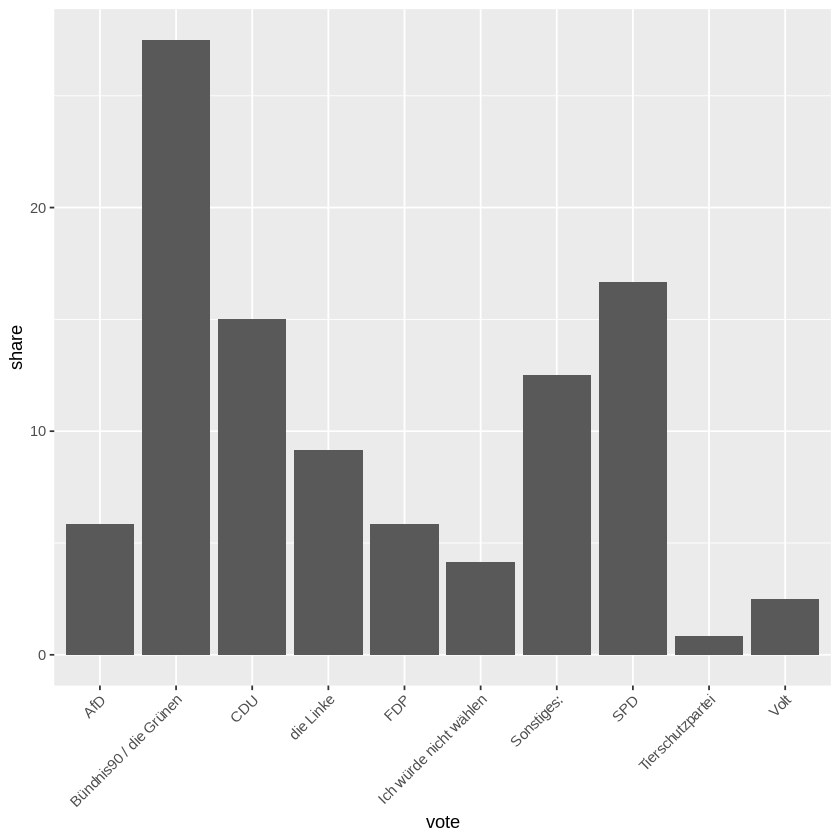

In [ ]:
survey %>%
  count(vote) %>%
  # Berechnen der Prozentanteile mit mutate, die neuen Variablen nennen wir dann totalvotes und share
  mutate(totalvotes = sum(n),
         share = n/totalvotes*100) %>%
  ggplot() +
  geom_col(aes(x = vote, y = share)) +
  scale_x_discrete(guide = guide_axis(angle = 45))

Oha, es scheint, als wären wir in einer links-grünen Blase gelandet. Ein Blick auf [aktuelle Umfragen](https://wahlrecht.de) legt nahe, dass der durchschnittliche Bundesbürger politisch etwas anders tickt als Sie und Ihre Kommillitoninnen und Kommillitonen.

Aber auch, wenn Sie zu den wenigen Konservativen im Kurs gehören, brauchen Sie sich keine Sorgen zu machen. Zum Glück respektieren sicher gerade an der Universität alle den fundamentalen Wert der Meinungsfreiheit und werden auch abweichenden Argumenten und Werthaltungen gegenüber respektvoll und aufgeschlossen sein. Sie brauchen auch nicht aus Höflichkeit über die politisch korrekten linksgrünen Scherze des Dozenten lachen. Er hat halt Marktforschung betrieben (Kursumfrage!) und will sich bei der Mehrheit anbiedern.

Wie sieht es denn unter den männlichen Studierenden aus?

In [ ]:
survey %>%
  # wir filtern den Datensatz nach Männer
  filter(geschlecht == "Männlich") %>%
  count(vote, sort = TRUE)

vote,n
<chr>,<int>
Bündnis90 / die Grünen,25
SPD,13
CDU,11
Sonstiges:,10
die Linke,7
FDP,5
AfD,4
Volt,3
Ich würde nicht wählen,2


Die letzten Befehle bestanden aus mehreren Zeilen, die durch “%>%” verbunden sind. Dies ist eine sogenannte pipe, die Befehle verknüpft. Die pipe nimmt jeweils den Output der vorhergehenden Zeile als Input der nachfolgenden Zeile, hier: Nimm Dir den survey-Datensatz, dann filtere weibliche Studierende heraus, dann zähle ihre Parteipräferenzen.
Wir werden die pipe nun immer nutzen, da man damit komplexe Befehlsketten sehr übersichtlich strukturieren kann.

## **The Gender Gap in Voting: Evidence from the University of Darmstadt.**

Jetzt lernen wir noch ein weiteres ggplot-geom kennen und nutzen dies gleich für eine Forschungsfrage.
Als SozialwissenschaftlerInnen sind wir ständig auf der Suche nach Mustern und Erklärungen der politischen und sozialen Realität. Unser Datensatz erlaubt es uns, dass wir die Studierenden nach Geschlecht getrennt betrachten können, um eine Politikwissenschaftliche Theorie zu untersuchen. Der *Gender Gap in Voting* ist eine langanhaltende Diskussion in der Forschung, die Unterschiede im Wahlverhalten zwischen den Geschlechten untersucht. Viele Studien konnten dabei beobachten, dass weibliche Wählerinnen eher liberal und weniger konservativ wählen als männliche Personen. Ihr Wahlverhalten haben wir uns bereits angesehen, aber wir können auch schauen, ob die Frauen linker sind als die Männer. In der Umfrage wurden Sie gebeten, sich auf einer allgemeinen “Links-Rechts-Achse” selbst einzuordnen. Diese Information ist in der Variablen lire_self hinterlegt. Die Verteilung der Variablen bilden wir nun mit einem density-plot ab und lassen uns die Werte für die Geschlechter getrennt darstellen. Wenn die Theorie wahr wäre, sollten wir beobachten, dass die Männer unter ihnen eher rechte Werte auf der Skala wählen als weibliche Studierende.

Um die Geschlechter zu vergleichen, erstellen wir eine Variable in der Studierenden der Wert *Male* zugeordnet wird, wenn sie männlich sind und der Wert *Female* wenn nicht. Dafür eignet sich der *ifelse* Befehl, wie der Name schon vermuten lässt.

In [ ]:
survey %>% count(geschlecht)

geschlecht,n
<fct>,<int>
Weiblich,38
Männlich,81
divers,1


Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


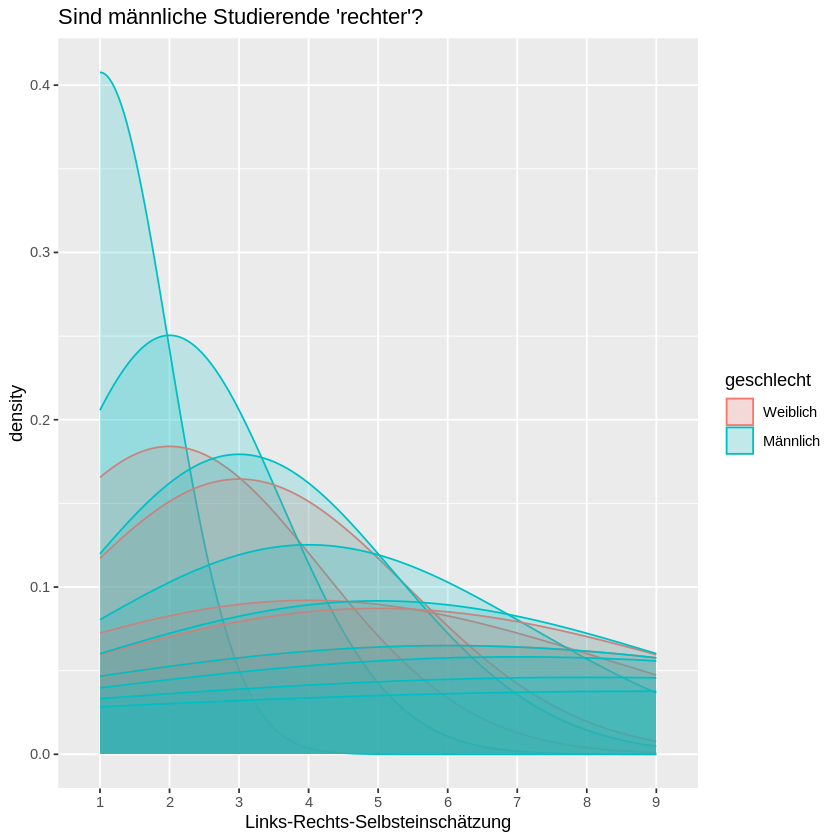

In [ ]:
survey %>%
  # Hier filtern wir Personen raus, die keine Angabe zum Geschlecht gemacht haben
  filter(geschlecht == "Weiblich" | geschlecht == "Männlich") %>%
  drop_na(geschlecht, lire_self) %>%
  mutate(lire_self = as.numeric(lire_self)) %>%
  # ggplot soll uns die Links-Rechts-Achse auf x projizieren und für
  # geschlecht unterschiedliche Farben und Füllung verwenden
  ggplot(aes(x = lire_self, color = geschlecht, fill = geschlecht)) +
  geom_density(alpha = 0.2, adjust = 1.5) +
  labs(title = "Sind männliche Studierende 'rechter'?",
       x = "Links-Rechts-Selbsteinschätzung")

Studierende verhalten sich eben nicht hypothesenkonform, wenn man es mal bräuchte... Die beiden Verteilungen unterscheiden sich nicht nennenswert.

Sie wissen jetzt übrigens auch, dass man mit *labs()* eine Abbildung und ihre Achsen beschriften kann.

Eine umfangreichere Auswertung der Umfrage finden Sie auf moodle.

Die Grafiken sind etwas schicker (haben aber auch deutlich mehr Zeit gekostet). Im Laufe des Kurses werden wir die Schönheit und Aussagekraft der Grafiken auch stetig verbessern.

## **Was sind Ihre eigenen Überlegungen?**

Schreiben Sie doch mal ein bisschen Code!

In [ ]:
# Hier könnte ihr Code stehen!